## Linear Regression and OLS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importing the required csv files saved previously from our feature and target files

X = pd.read_csv('../Capstone_1_project/Capstone_1_Linear_models/cleaned_df.csv').set_index('id')

In [3]:
y = pd.read_csv('../Capstone_1_project/Capstone_1_Linear_models/price_df.csv').set_index('id')

In [4]:
X.columns.values

array(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included',
       'minimum_nights', 'host_is_superhost', 'Laptop_friendly_workspace',
       'Family_kid_friendly', 'Host_greets_you', 'Smoking_is_allowed',
       'distance_to_midcenter', 'size', 'host_has_profile_pic_0',
       'host_has_profile_pic_1', 'instant_bookable_f',
       'instant_bookable_t', 'is_business_travel_ready_f',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'], dtype=object)

In [5]:
corrMatrices = X.corr()

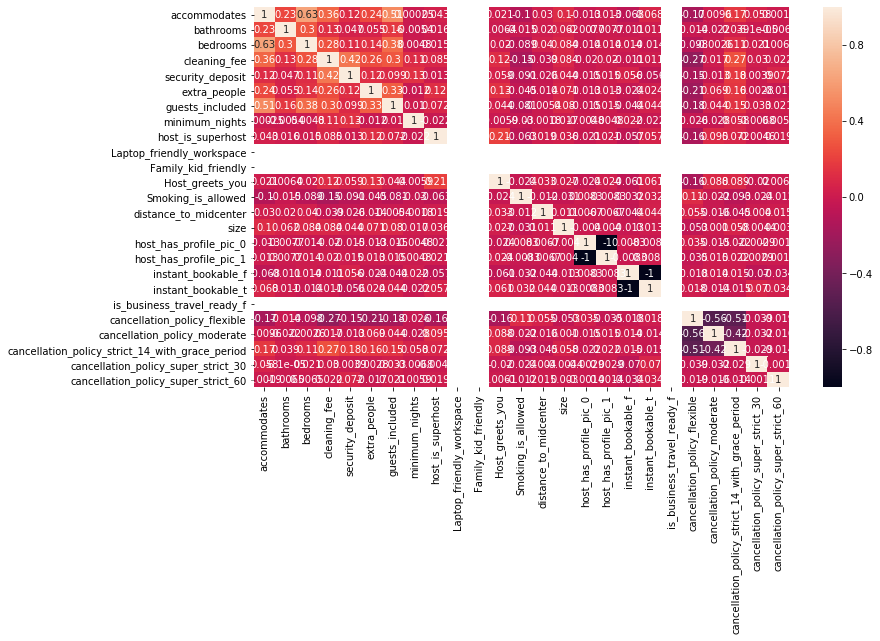

In [6]:
plt.figure(figsize = (12,7))
sns.heatmap(corrMatrices, annot=True)

The above figure shows the correlation between all independent variables(features). The correlation matrix is very useful in feature selection on which features to include if they are not much correlated with one another. Having correlated variables, for example, around 0.7 or 0.8 would not be useful to include(multiple variables), so can remove one of them, in order to increase the accuracy of our model.

In [7]:
# # Splitting data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(15673, 25)
(6718, 25)
15673
6718


## Ordinary Least Squares for Simple Linear Regression

OLS is useful for which it forms a ‘straight line’ which is as close as possible to the data points. OLS is very useful for the Regression tasks because it provides best Linear Unbiased Estimators of α and β. Let us now look at how to implement the OLS using **StatsModels**.

In [9]:
import statsmodels.api as sm

X_train_ = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train_.astype(float))
res = ols_model.fit()

C:\Users\Ravi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     602.4
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:06:30   Log-Likelihood:                -76673.
No. Observations:               15673   AIC:                         1.534e+05
Df Residuals:                   15653   BIC:                         1.535e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The OLS results summary provides a brief description on how each feature measures with its p-value and other test scores, which is very useful in selecting our features for the model. We can select our features using p-value set at 0.05 as a standard measure so that we can avoid collinearity issues.

In [11]:
# Training the data again by removing some features which may not be useful in detecting the price in our model.

X_train_new = X_train_.drop(columns=["host_has_profile_pic_0", "host_has_profile_pic_1", "Host_greets_you"], axis=1)

ols_model_new = sm.OLS(y_train, X_train_new.astype(float))
res_new = ols_model_new.fit()

print(res_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     673.3
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:06:30   Log-Likelihood:                -76673.
No. Observations:               15673   AIC:                         1.534e+05
Df Residuals:                   15655   BIC:                         1.535e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [12]:
# predicting the values

ols_model_new.predict(sm.add_constant(X_test).drop(columns=["host_has_profile_pic_0", "host_has_profile_pic_1", "Host_greets_you"], axis=1).T)

array([[695.9177984904275, 644.7672938724131, 190.42344308093794, ...,
        2426.254105213401, 518.8265317429464, 593.5740797681751],
       [1725.8533879552842, 362056.0359724709, 160.43388074907764, ...,
        406504.58706929453, 795.1220723131033, 1493.3889379746838],
       [931.7245475988215, 226403.88394357308, 135.10842963546605, ...,
        253865.06489137694, 272.6552904124708, 1147.367494101527],
       ...,
       [1169.352184962666, 2424.146449055106, 960.667083474536, ...,
        5591.519531581371, 906.3146054079201, 1291.2987992359706],
       [1054.9653956919065, 1346.708630933143, 516.8395607897794, ...,
        3692.736477332188, 820.3093685135121, 1009.2329383884313],
       [1663.730999205311, 1165.9654112979592, 773.2223832656844, ...,
        5866.721694964743, 1666.0218768055613, 1623.0047641226683]],
      dtype=object)

### Linear Regression Model:

Since I am dealing with a regression task, I can use Linear Regression for it. Linear Regression models a target prediction value based on independent variables. So, I now implement how the model will perform against my dataset as below

In [13]:
# Split the training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [15]:
#Train the Linear Regressor model and import necessary modules

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept= False)

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred))}")
print(f"Train R2 score: {r2_score(y_train, y_pred)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R2 score: {r2_score(y_test, y_test_pred)}")

Training Mean Squared Error: 48.958827558366444
Train R2 score: -0.3323671704527098
Testing Mean Squared Error: 47.82785398336102
Test R2 score: -0.3177462410213405


From the above model, it is evident that Linear Regressor model is not performing well at all.. In fact it has a negative R2 score which can mean that this model is performing worst. Let us try Regularized Models and see if they perform any better, because Regularization can prevent overfitting and reduce the model complexity.

### Ridge Regression Model : 

Ridge regression can shrink the coefficients and helps to reduce the model complexity and multi-collinearity, which we have seen from above OLS methods

In [17]:
# importing RidgeCV with Crossvalidation, so I can choose the best regularized alpha velue

from sklearn.linear_model import RidgeCV

modelCV = RidgeCV(alphas = [0.1, 0.01, 0.05, 0.001,0.0001, 1, 2, 5, 10], store_cv_values = True)
modelCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-01, 1.e-02, 5.e-02, 1.e-03, 1.e-04, 1.e+00, 2.e+00, 5.e+00,
       1.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [18]:
alpha = modelCV.alpha_
alpha

10.0

In [19]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = alpha)
reg.fit(X_train, y_train)

y_reg_pred = reg.predict(X_train)
y_reg_test_pred = reg.predict(X_test)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_reg_pred,y_train))}")
print(f"Train R2 score: {r2_score(y_reg_pred,y_train)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_reg_test_pred,y_test))}")
print(f"Test R2 score: {r2_score(y_reg_test_pred, y_test)}")

Training Mean Squared Error: 32.23585802253059
Train R2 score: -0.36836488748971496
Testing Mean Squared Error: 30.715025571958186
Test R2 score: -0.17771417733419304


From the results, even though it did a bit better than Linear Regression model, it is still bad compared to the results I was expecting for a model. Let us work through another model which combines both L1 and L2 regularizations in one model called ElasticNet.

### ElasticNet Regression Model:

ElasticNet Model is useful when I have more correlated variables(deals with multicollinearity issues). Sets the proper alpha value between 0 and 1.

In [20]:
# importing ElasticNet model to train the data with Cross Validation

from sklearn.linear_model import ElasticNetCV, ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(model.alpha_)
print(model.intercept_)

0.3
57.84718943405857


C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
elastic=ElasticNet(alpha=0.001)
elastic.fit(X_train, y_train)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_train,elastic.predict(X_train)))}")
print(f"Train R2 score: {r2_score(elastic.predict(X_train), y_train)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_test,elastic.predict(X_test)))}")
print(f"Test R2 score: {r2_score(elastic.predict(X_test), y_test)}")

Training Mean Squared Error: 32.23585757261379
Train R2 score: -0.3682757282945377
Testing Mean Squared Error: 30.715058330222092
Test R2 score: -0.17764142549161255


As we can see from the R2 scores and Mean squared error, Elastic Net is also not very useful in determining proper price as a dependant variable. So, this model also performs bad. Below figure shows the original scatter points of the testing data set.

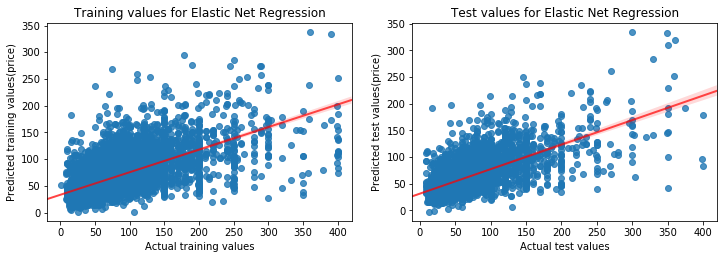

In [26]:
'''x_ax = range(len(X_test))
#plt.scatter(elastic.predict(X_test), y_test, s=5, color="blue", label="original")
sns.regplot(y_train, elastic.predict(X_train), line_kws={"color":"r","alpha":0.7,"lw":2})
#plt.plot(x_ax, elastic.predict(X_test), lw=0.8, color="red", label="predicted")
plt.show()'''


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.regplot(y_train, elastic.predict(X_train), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual training values')
plt.ylabel('Predicted training values(price)')
plt.title('Training values for Elastic Net Regression')
plt.subplot(2,2,2)
sns.regplot(y_test, elastic.predict(X_test), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values(price)')
plt.title('Test values for Elastic Net Regression')
plt.show()

Since, from the above linear models which we have trained the data on, does not perform well, which comprises of lower accuracy scores and R2 scores on trainign and testing set, we will try to move to non Linear models and check if they perform better than what was acheived from the comprising Linear models. 